In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression     
from sklearn.linear_model import SGDClassifier
import xgboost as xgb
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier         
from sklearn.ensemble import RandomForestClassifier    
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score, confusion_matrix

In [66]:
data = pd.read_csv('data.csv',delimiter=';')
data.head()

,closed_cred_sum,closed_creds,active_cred_sum_overdue,active_cred_sum,active_cred_day_overdue,active_cred_max_overdue,age,gender,region,first_loan,loan_cost_all,first_days_quant,month_income,order_date,cost_all,order_id,client_id,expert
0,143822.0,22,104.12,130068.80,8,756.09,31,0,36,10000.0,10000,196,0.0,2017-07-23,0.0,728319,320464,1
1,0.0,0,38151.93,46230.00,1492,38151.93,51,0,93,10000.0,10000,17,20000.0,2017-07-23,0.0,728321,320466,1
2,51356.0,2,3000.00,3000.00,8,3000.00,28,1,3,10000.0,10000,84,0.0,2017-07-23,0.0,728323,320467,1
3,0.0,0,22784.19,32103.52,913,22784.19,28,0,52,10000.0,10000,7,0.0,2017-07-23,0.0,728447,320533,1
4,12298.0,1,4942.95,4950.00,2883,4942.95,31,0,47,5000.0,5000,20,0.0,2017-07-23,0.0,728421,298598,1


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   closed_cred_sum          50001 non-null  float64
 1   closed_creds             50001 non-null  int64  
 2   active_cred_sum_overdue  50001 non-null  float64
 3   active_cred_sum          50001 non-null  float64
 4   active_cred_day_overdue  50001 non-null  int64  
 5   active_cred_max_overdue  50001 non-null  float64
 6   age                      50001 non-null  int64  
 7   gender                   50001 non-null  int64  
 8   region                   50001 non-null  int64  
 9   first_loan               49982 non-null  float64
 10  loan_cost_all            50001 non-null  int64  
 11  first_days_quant         50001 non-null  int64  
 12  month_income             50001 non-null  float64
 13  order_date               50001 non-null  object 
 14  cost_all              

In [68]:
data.describe()

,closed_cred_sum,closed_creds,active_cred_sum_overdue,active_cred_sum,active_cred_day_overdue,active_cred_max_overdue,age,gender,region,first_loan,loan_cost_all,first_days_quant,month_income,cost_all,order_id,client_id,expert
count,5.000100e+04,50001.000000,5.000100e+04,5.000100e+04,50001.000000,5.000100e+04,50001.000000,50001.000000,50001.000000,49982.000000,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,1.865780e+05,7.974001,5.217919e+04,1.964205e+05,722.563769,3.776984e+04,35.018900,0.462691,28.825083,7751.682606,6703.681926,23.954561,24943.402642,1233.828788,734747.279874,290563.956781,0.749265
std,5.057408e+05,13.933307,2.537311e+05,4.365213e+05,1371.656677,1.703992e+05,11.235206,0.498611,29.726162,5310.782009,4610.529844,36.670176,20652.768218,4556.672041,26254.078989,74592.964584,0.433441
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,18.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,695828.000000,109.000000,0.000000
25%,5.502000e+03,1.000000,0.000000e+00,1.467400e+04,0.000000,4.870800e+02,27.000000,0.000000,0.000000,5000.000000,3000.000000,10.000000,0.000000,0.000000,715042.000000,294858.000000,0.000000
50%,4.287400e+04,4.000000,5.000000e+03,5.703022e+04,64.000000,6.765660e+03,32.000000,0.000000,25.000000,7000.000000,7000.000000,20.000000,25000.000000,0.000000,734707.000000,316156.000000,1.000000
75%,1.740713e+05,9.000000,3.157990e+04,1.972360e+05,923.000000,2.449949e+04,41.000000,1.000000,52.000000,10000.000000,10000.000000,20.000000,35000.000000,0.000000,749477.000000,330172.000000,1.000000
max,4.457421e+07,563.000000,3.303100e+07,2.273166e+07,21927.000000,2.170166e+07,99.000000,1.000000,99.000000,100000.000000,100000.000000,336.000000,550000.000000,238770.420000,840692.000000,393528.000000,1.000000


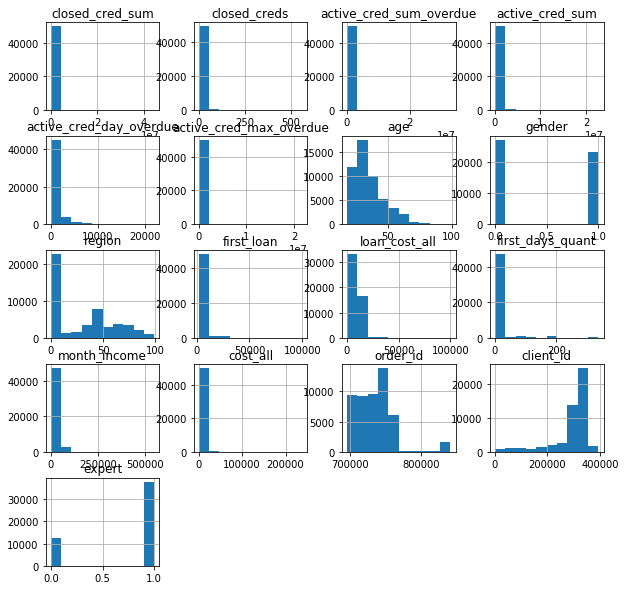

In [69]:
data.hist(figsize=(10,10)); # распределение значений у признаков

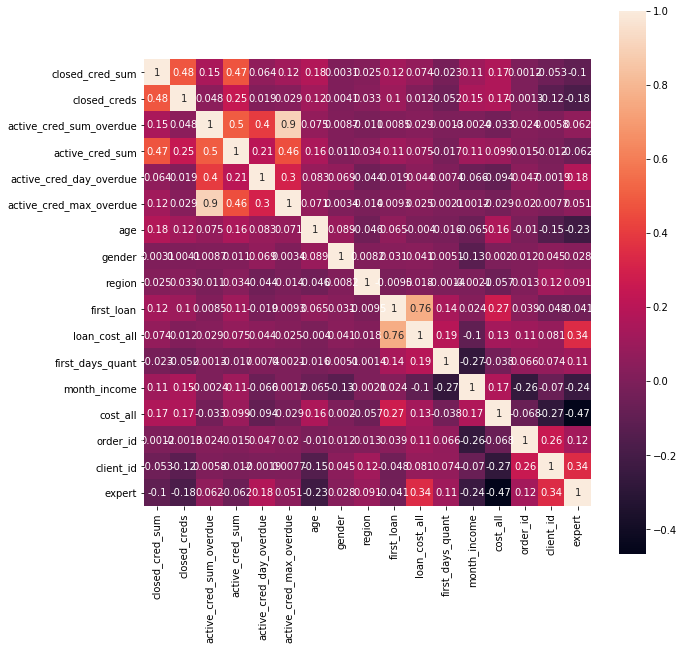

In [70]:
# матрица корреляции признаков 
plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(),square=True, annot=True)
plt.show()

In [71]:
data.order_id.value_counts() # есть дубликаты

709271    6
749780    6
757380    5
743547    5
760818    5
         ..
728200    1
726153    1
724106    1
722059    1
724990    1
Name: order_id, Length: 42857, dtype: int64

In [72]:
data[data.order_id.duplicated()].shape #количество дубликатов
data = data.drop_duplicates(subset='order_id') # удаляем дубликаты

### 1. closed_cred_sum - сумма, которую клиент выплатил по ранее взятым и закрытым кредитам

In [73]:
data.closed_cred_sum.describe()

count    4.285700e+04
mean     1.797138e+05
std      5.100578e+05
min      0.000000e+00
25%      5.000000e+03
50%      3.966400e+04
75%      1.648040e+05
max      4.457421e+07
Name: closed_cred_sum, dtype: float64

In [74]:
len(data[data.closed_cred_sum.isnull() == True]) # пропусков нет

0

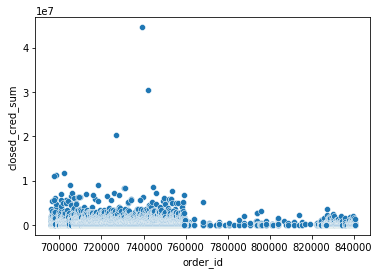

In [75]:
# визуально оценим наличие выбросов
sns.scatterplot(x=data.order_id,y=data.closed_cred_sum);

In [76]:
data = data.query('closed_cred_sum < 20000000') #удалим выбросы

In [77]:
data.closed_cred_sum = StandardScaler().fit_transform(data[['closed_cred_sum']]) #нормализуем данные

### 2. closed_creds - количество закрытых кредитов

In [78]:
data.closed_creds.describe()

count    42854.000000
mean         7.818803
std         13.954303
min          0.000000
25%          1.000000
50%          3.000000
75%          9.000000
max        563.000000
Name: closed_creds, dtype: float64

In [79]:
len(data[data.closed_creds.isnull() == True]) #пропусков нет

0

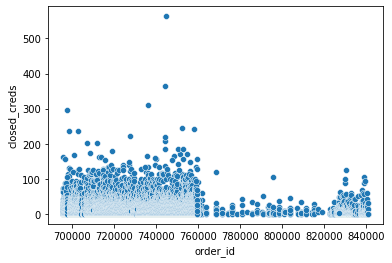

In [80]:
sns.scatterplot(x=data.order_id,y=data.closed_creds);

In [81]:
data = data.query('closed_creds < 200') #уберем выбросы 

In [82]:
data.closed_creds = StandardScaler().fit_transform(data[['closed_creds']]) # нормализуем данные

### 3. active_cred_sum_overdue - суммарная задолженность по активным кредитам

In [83]:
data.active_cred_sum_overdue.describe()

count    4.284100e+04
mean     4.973258e+04
std      2.471757e+05
min      0.000000e+00
25%      0.000000e+00
50%      5.000000e+03
75%      3.039060e+04
max      3.303100e+07
Name: active_cred_sum_overdue, dtype: float64

In [84]:
len(data[data.active_cred_sum_overdue.isnull() == True]) # пропусков нет

0

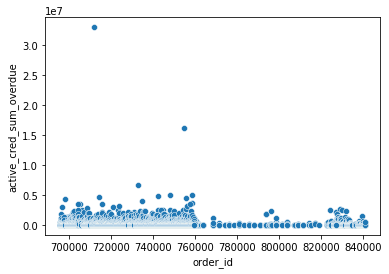

In [85]:
sns.scatterplot(x=data.order_id,y=data.active_cred_sum_overdue);

In [86]:
data = data.query('active_cred_sum_overdue<10000000') #уберем выбросы

In [87]:
data.active_cred_sum_overdue = StandardScaler().fit_transform(data[['active_cred_sum_overdue']])

### 4. active_cred_sum - сумма всех активных кредитов

In [88]:
data.active_cred_sum.describe()

count    4.283900e+04
mean     1.875458e+05
std      4.075649e+05
min      0.000000e+00
25%      1.349955e+04
50%      5.416145e+04
75%      1.879753e+05
max      1.550253e+07
Name: active_cred_sum, dtype: float64

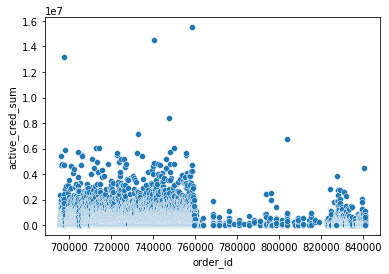

In [89]:
sns.scatterplot(x=data.order_id,y=data.active_cred_sum);

In [90]:
sum(data.active_cred_sum.isnull() == True) # пропусков нет

0

In [91]:
data = data.query('active_cred_sum < 7000000') #убираем выбросы

In [92]:
data.active_cred_sum = StandardScaler().fit_transform(data[['active_cred_sum']]) #нормализуем данные 

### 5. active_cred_day_overdue - суммарная просрочка в днях по всем активным кредитам

In [93]:
data.active_cred_day_overdue.describe()

count    42834.000000
mean       702.343232
std       1334.866226
min          0.000000
25%          0.000000
50%         61.000000
75%        903.000000
max      21927.000000
Name: active_cred_day_overdue, dtype: float64

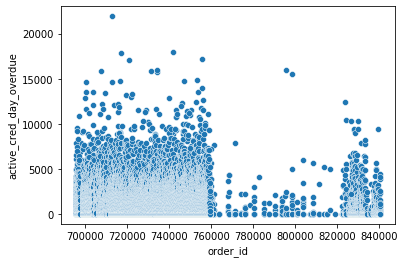

In [94]:
sns.scatterplot(x=data.order_id,y=data.active_cred_day_overdue);

In [95]:
sum(data.active_cred_day_overdue.isnull() == True) #пропусков нет

0

In [96]:
data = data.query('active_cred_day_overdue<18000') #удаляем выбросы

In [97]:
data.active_cred_day_overdue = StandardScaler().fit_transform(data[['active_cred_day_overdue']]) #нормализуем данные

### 6. active_cred_max_overdue - максимальная сумма просроченной задолженности по активным кредитам

In [98]:
data.active_cred_max_overdue.describe()

count    4.283300e+04
mean     3.557952e+04
std      1.234470e+05
min      0.000000e+00
25%      3.554100e+02
50%      6.420830e+03
75%      2.344215e+04
max      1.120089e+07
Name: active_cred_max_overdue, dtype: float64

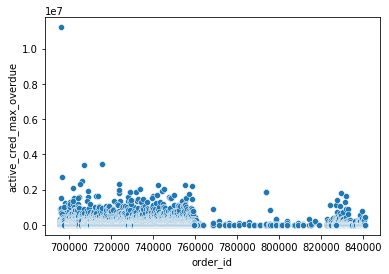

In [99]:
sns.scatterplot(x=data.order_id,y=data.active_cred_max_overdue);

In [100]:
sum(data.active_cred_max_overdue.isnull()==True) # пропусков нет

0

In [101]:
data = data.query('active_cred_max_overdue < 4000000') #удаляем выбросы

In [102]:
data.active_cred_max_overdue = StandardScaler().fit_transform(data[['active_cred_max_overdue']])

### 7. age

In [103]:
data.age.describe()

count    42832.000000
mean        35.008778
std         11.333519
min         18.000000
25%         27.000000
50%         32.000000
75%         41.000000
max         99.000000
Name: age, dtype: float64

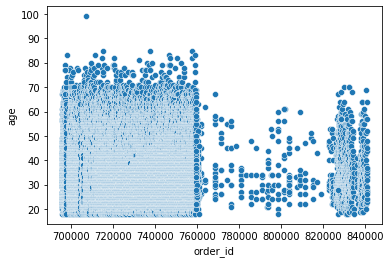

In [104]:
sns.scatterplot(x=data.order_id,y=data.age);

### 8. gender

In [105]:
data.gender.value_counts()

0    23166
1    19666
Name: gender, dtype: int64

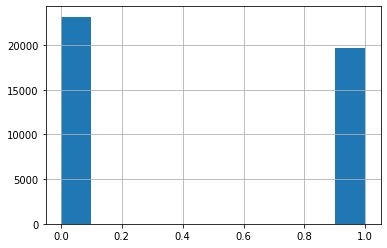

In [106]:
data.gender.hist();

### 9. region

In [107]:
data.region.value_counts()

0     17583
40     3663
36     1589
75     1521
65     1316
      ...  
48       14
85       13
43       12
21        7
9         5
Name: region, Length: 99, dtype: int64

### 10. month_income

In [108]:
data.month_income.describe()

count     42832.000000
mean      25513.260658
std       20530.651163
min           0.000000
25%           0.000000
50%       26000.000000
75%       35000.000000
max      550000.000000
Name: month_income, dtype: float64

In [109]:
sum(data.month_income.isnull())

0

In [110]:
data.month_income.value_counts()

0.0         12164
35000.0     10566
50000.0      6364
20000.0      4402
25000.0      2049
            ...  
9400.0          1
30.0            1
12100.0         1
500000.0        1
24900.0         1
Name: month_income, Length: 247, dtype: int64

In [111]:
income_0 = len(data[data.month_income == 0])/len(data)

print('Без указания заработной платы : {}%'.format(round(income_0*100,1)))

Без указания заработной платы : 28.4%


In [112]:
# заменим нулевую заработную плату медианным значением
data.month_income = np.where(data.month_income == 0, data.month_income.median(),data.month_income)

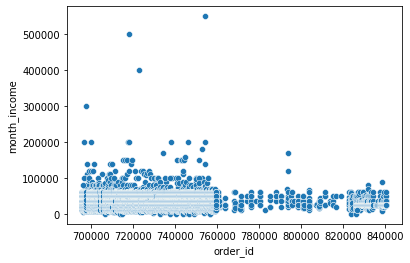

In [113]:
sns.scatterplot(x=data.order_id,y=data.month_income);

In [114]:
data = data.query('month_income < 200000') #удалим выбросы

In [115]:
data.month_income = StandardScaler().fit_transform(data[['month_income']]) #нормализуем данные 

### 11. first_loan - сумма, которую клиент хочет получить в кредит (из заявки)

In [116]:
data.first_loan.describe()

count     42804.000000
mean       7717.738996
std        5422.609225
min        2000.000000
25%        5000.000000
50%        7000.000000
75%       10000.000000
max      100000.000000
Name: first_loan, dtype: float64

In [117]:
sum(data.first_loan.isnull())

17

In [118]:
data.dropna(inplace=True) # удаляем строки с пропусками

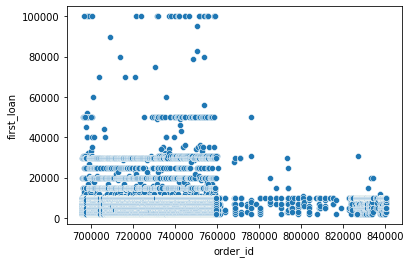

In [119]:
sns.scatterplot(x=data.order_id,y=data.first_loan);

In [120]:
data.first_loan = StandardScaler().fit_transform(data[['first_loan']]) #нормализуем данные 

### 12. first_days_quant - срок, на которую клиент хочет взять кредит 

In [121]:
data.first_days_quant.describe()

count    42804.000000
mean        24.163700
std         37.737583
min          7.000000
25%         10.000000
50%         20.000000
75%         20.000000
max        336.000000
Name: first_days_quant, dtype: float64

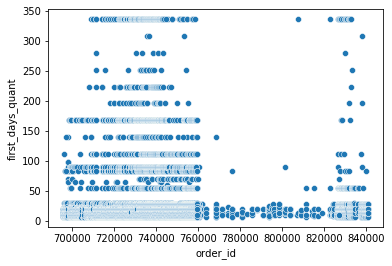

In [122]:
sns.scatterplot(x=data.order_id, y=data.first_days_quant);

In [123]:
sum(data.first_days_quant.isnull()) #пропусков нет

0

In [124]:
data.first_days_quant = StandardScaler().fit_transform(data[['first_days_quant']])

### 13. loan_cost_all - одобренная клиенту сумма кредита 

In [125]:
data.loan_cost_all.describe()

count     42804.000000
mean       6626.485842
std        4652.633517
min         100.000000
25%        3000.000000
50%        7000.000000
75%       10000.000000
max      100000.000000
Name: loan_cost_all, dtype: float64

In [126]:
sum(data.loan_cost_all.isnull()) # пропусков нет

0

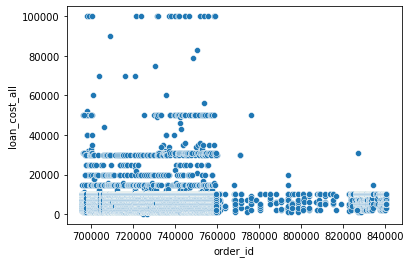

In [127]:
sns.scatterplot(x=data.order_id,y=data.loan_cost_all);

In [128]:
data.loan_cost_all = StandardScaler().fit_transform(data[['loan_cost_all']])

### 14. order_date - дата подачи заявки на получение кредита

In [129]:
print(f'Данные представлены за период с {data.order_date.min()} по {data.order_date.max()}')

Данные представлены за период с 2017-06-26 по 2017-09-25


### 15. cost_all - сумма всех выплат по одобренному кредиту

In [130]:
data.cost_all.describe()

count     42804.000000
mean       1305.480165
std        4688.643633
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      238770.420000
Name: cost_all, dtype: float64

In [131]:
sum(data.cost_all.isnull()) # пропусков нет

0

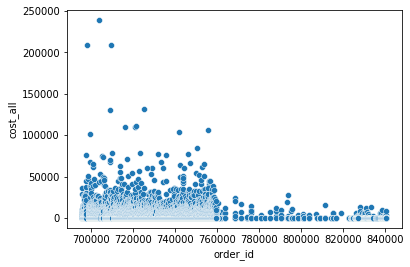

In [132]:
sns.scatterplot(x=data.order_id, y=data.cost_all);

In [133]:
data = data.query('cost_all < 150000') #удалим выбросы 

In [134]:
data.cost_all = StandardScaler().fit_transform(data[['cost_all']])

### 16. expert - решение, которое принято по заявке (0 - одобрено, 1 - отклонено)

1    0.738698
0    0.261302
Name: expert, dtype: float64

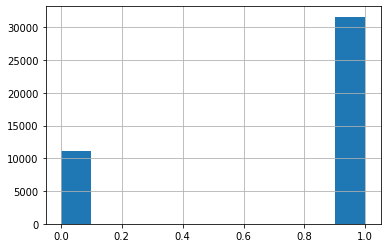

In [135]:
data.expert.hist()
data.expert.value_counts(normalize=True)
# наблюдений с классом отколнено в 3 раза больше, чем наблюдений с классом одобрено 

# Выбор модели

In [151]:
X = data.drop(columns=['order_id','client_id','order_date','region','expert'])
y = data.expert

In [152]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)
clf_name = []
clf_score = []

## RandomForestClassifier

In [153]:
random_forest_clf = RandomForestClassifier(random_state=42, class_weight= 'balanced_subsample')
random_forest_clf.fit(X_train,y_train)
rf_pred = random_forest_clf.predict(X_test)
random_forest_clf_score = random_forest_clf.score(X_test,y_test)
print(f'RandomForestClassifier - {random_forest_clf_score}')
clf_name.append('RandomForestClassifier')
clf_score.append(random_forest_clf_score)

RandomForestClassifier - 0.9861946902654867


In [154]:
data_feat = pd.DataFrame({'feature':X_test.columns, \
                          'feature_importances':random_forest_clf.feature_importances_}). \
                            sort_values(by='feature_importances',ascending=False)

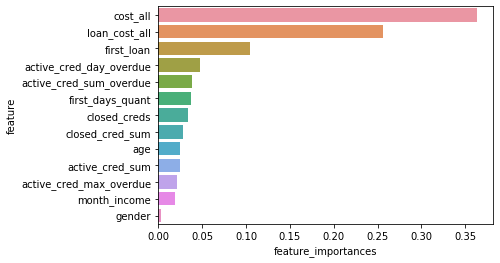

In [155]:
sns.barplot(x='feature_importances',y='feature',data=data_feat)

## SVM

In [156]:
svm_clf = svm.SVC()
svm_clf.fit(X_train,y_train)
svm_score = svm_clf.score(X_test,y_test)
svm_pred = svm_clf.predict(X_test)
print(f'SVM - {svm_score}')
clf_name.append('SVM')
clf_score.append(svm_score)

SVM - 0.9532743362831858


## GradientBoostingClassifier

In [157]:
grad_clf = GradientBoostingClassifier(random_state=42,learning_rate=0.01)
grad_clf.fit(X_train,y_train)
grad_predict = grad_clf.predict(X_test)
grad_score = grad_clf.score(X_test,y_test)
print(f'GradientBoostingClassifier - {grad_score}')
clf_name.append('GradientBoostingClassifier')
clf_score.append(grad_score)

GradientBoostingClassifier - 0.9534159292035398


## MLPClassifier

In [158]:
mlp_clf = MLPClassifier(solver='adam', alpha=1e-5, activation='identity',random_state=42)
mlp_clf.fit(X_train,y_train)
mlp_predict = mlp_clf.predict(X_test)
mlp_clf_score = mlp_clf.score(X_test,y_test)
print(f'MLPClassifier - {mlp_clf_score}')
clf_name.append('MLPClassifier')
clf_score.append(mlp_clf_score)

MLPClassifier - 0.9845663716814159


## Naive Bayes 

In [159]:
bayes_clf = GaussianNB()
bayes_clf.fit(X_train,y_train)
bayes_score = bayes_clf.score(X_test,y_test)
print(f'Naive Bayes - {bayes_score}')
clf_name.append('Naive Bayes')
clf_score.append(bayes_score)

Naive Bayes - 0.9278584070796461


## SGDClassifier

In [160]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train)
sgd_clf_score = sgd_clf.score(X_test,y_test)
print(f'SGDClassifier - {sgd_clf_score}')
clf_name.append('SGDClassifier')
clf_score.append(sgd_clf_score)

SGDClassifier - 0.9750088495575221


## DecisionTreeClassifier  

In [161]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train,y_train)
# tree_clf_pred = tree_clf.predict(X_test)
tree_clf_score = tree_clf.score(X_test,y_test)
print(f'DecisionTreeClassifier - {tree_clf_score}')
clf_name.append('DecisionTreeClassifier')
clf_score.append(tree_clf_score)

DecisionTreeClassifier - 0.9753628318584071


## LogisticRegression

In [162]:
log_reg_clf = LogisticRegression(random_state=42,max_iter=400)
log_reg_clf.fit(X_train,y_train)
log_reg_pred = log_reg_clf.predict(X_test)
log_reg_clf_score = log_reg_clf.score(X_test,y_test)
print(f'LogisticRegression - {log_reg_clf_score}')
clf_name.append('LogisticRegression')
clf_score.append(log_reg_clf_score)

LogisticRegression - 0.9830796460176991


## XGBoost 

In [163]:
clf_xgb = xgb.XGBClassifier(alpha=0.001)
clf_xgb.fit(X_train,y_train)
xgb_predict = clf_xgb.predict(X_test)
clf_xgb_score = clf_xgb.score(X_test,y_test)
print(f'XGBoost - {clf_xgb_score}')
clf_name.append('XGBoost')
clf_score.append(clf_xgb_score)

XGBoost - 0.9878230088495575


In [164]:
res_data = pd.DataFrame({'clf':clf_name,'clf_score':clf_score}).sort_values(by='clf_score',ascending=False)
res_data

,clf,clf_score
8,XGBoost,0.987823
0,RandomForestClassifier,0.986195
3,MLPClassifier,0.984566
7,LogisticRegression,0.983080
6,DecisionTreeClassifier,0.975363
5,SGDClassifier,0.975009
2,GradientBoostingClassifier,0.953416
1,SVM,0.953274
4,Naive Bayes,0.927858


In [165]:
# Метрики качества
accuracy = accuracy_score(y_test,xgb_predict)
precision = precision_score(y_test, xgb_predict)
recall = recall_score(y_test, xgb_predict)
f1_score_ = f1_score(y_test,xgb_predict)
confusion_matrix_ = confusion_matrix(y_test,xgb_predict)

print(f'accuracy - {accuracy}')
print(f'precision - {precision}')
print(f'recall - {recall}')
print(f'f1_score - {f1_score_}')
print(confusion_matrix_)

accuracy - 0.9878230088495575
precision - 0.986101919258769
recall - 0.9976087996174079
f1_score - 0.9918219855458349
[[ 3523   147]
 [   25 10430]]
